
# <span style="color:rgb(213,80,0)">Generate Figure 7 of the paper Choice of trimming proportion and number of clusters in robust clustering based on trimming  </span>

### Luis A. García\-Escudero, Christian Hennig, Agustin Mayo Iscar,  Gianluca Morelli, Marco Riani,

Remark: we assume that you have FSDA installed, at least version 8.7.7.5

## Geyser data

In [1]:
% Load the Geyser dataset
Y=load('geyser2.txt');


In [2]:
k = 1:5; % number of groups to test
alphaTrim = 0.00:0.02:0.2; % level of trimmin to test
cc = 50; % restriction factor
nsamp =  1000; % number of  subsets for each k and alpha
nsimul = 100; % number of replicates
crit = 0.10; % p-value threshold

bands=struct;
bands.nsimul=nsimul;
bands.outliersFromUniform = 1;
bands.crit=crit;
[outCTL] = ctlcurves(Y(:,1:end), 'alpha',alphaTrim,'kk',k,'bands',bands, 'restrfactor',cc, 'nsamp',nsamp,'plots',0);

Starting parallel pool (parpool) using the 'Processes' profile ...
Connected to parallel pool with 8 workers.
k=1
k=2
k=3
k=4
k=5
Bands k=1
Bands k=2
Bands k=3
Bands k=4
Bands k=5

In [3]:
disp('Show the Values of p_{k,α}')

Show the Values of p_{k,α}

In [4]:
disp(outCTL.LRTpval)

                  alpha=0    alpha=0.02    alpha=0.04    alpha=0.06    alpha=0.08    alpha=0.1    alpha=0.12    alpha=0.14    alpha=0.16    alpha=0.18    alpha=0.2
                  _______    __________    __________    __________    __________    _________    __________    __________    __________    __________    _________
    k=1_vs_k=2       0             0             0             0             0            0             0             0             0             0            0   
    k=2_vs_k=3       0             0             0             0             0            0             0             0             0             0            0   
    k=3_vs_k=4       0             0          0.18          0.72          0.88         0.45          0.71          0.71          0.54          0.81         0.61   
    k=4_vs_k=5       0          0.71          0.88          0.78          0.98         0.96          0.96           0.9          0.81          0.91         0.71

In [5]:

[~,index]=unique(outCTL.LRTtentSolt.k,'stable');
Solt=outCTL.LRTtentSolt(index,:);
Sol=outCTL.LRTtentSol(index,:);
SolIdx=outCTL.LRTtentSolIDX(:,index);
disp('Show the list of tentative solutions automatically extracted')

Show the list of tentative solutions automatically extracted

In [6]:
disp(Solt(:,1:3))

            index    k    alpha
            _____    _    _____
    Sol1      1      4    0.02 
    Sol2      2      3    0.04

### Show the solutions automatically found (Figure 7)

Remark: note that in the live version the legends are clickable and it is possible to hide/show the single groups



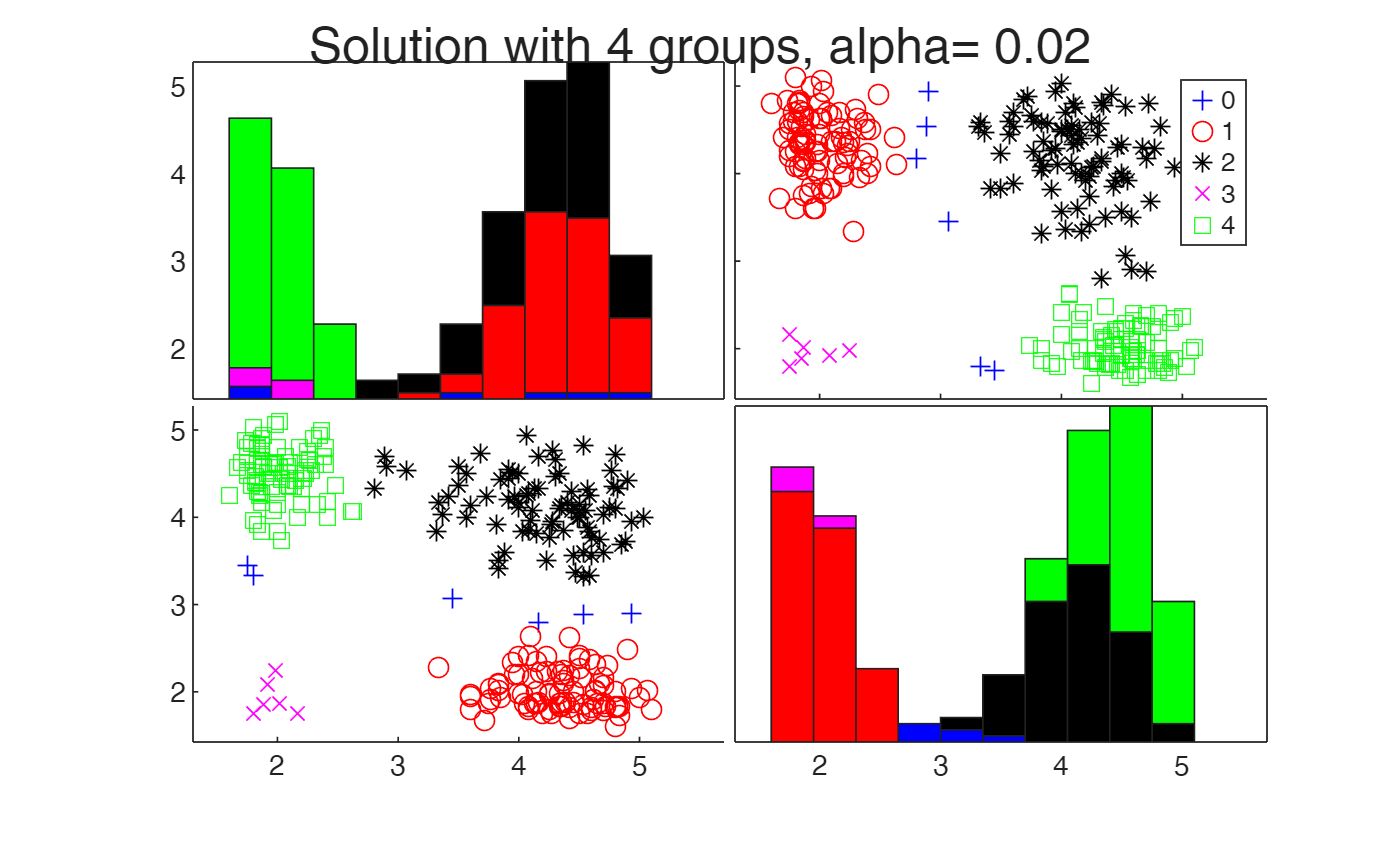


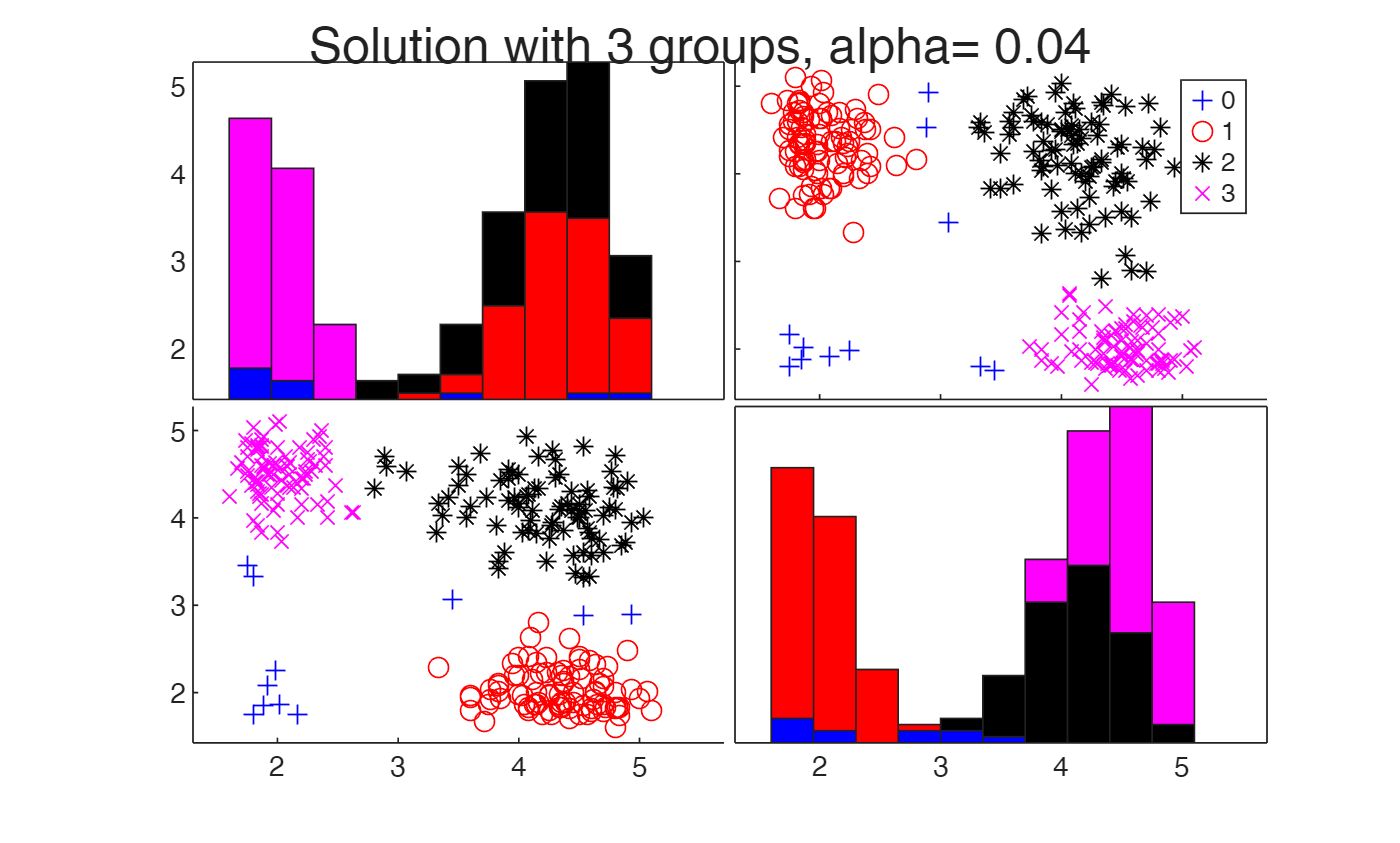

In [7]:
for j=Sol(:,2)'

    solj=Sol(:,2)==j;
    spmplot(Y,'group',SolIdx(:,solj) ,'tag',['pl' num2str(j)]);
    sgtitle(['Solution with ' num2str(Sol(solj,2)) ' groups, alpha= ' num2str(Sol(solj,3))])
end




!!!EndOutputRegion!!!